# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Febriana Nur Syifa Rizqi
- **Email:** syifa6276@gmail.com
- **ID Dicoding:** febriananursyifa

## Menentukan Pertanyaan Bisnis

- Bagaimana tren peminjaman sepada dari tahun ke tahun?
- Bagaimana pola trafic peminjaman sepeda dalam sehari?
- Bagaimana perbedaan jumlah peminjaman sepeda pada hari kerja dan hari libur?
- Bagaimana pengaruh musim, cuaca, temperatur, kelembapan, dan kecepatan angin terhadap jumlah peminjaman sepada?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
day_df = pd.read_csv('bike-sharing-dataset/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
hour_df = pd.read_csv('bike-sharing-dataset/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Bike Sharing Dataset terdiri atas 2 tabel, yaitu `day_df` dan `hour_df`. `day_df` merupakan tabel yang memberikan informasi peminjaman sepeda secara harian sedangkan `hour_df` memberikan informasi peminjaman sepeda per jam.
- `hour_df` memiliki 17379 records sementara `day_df` memiliki 731 records.
- `hour_df` memiliki 17 kolom, yaitu:
    - instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : whether day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	- weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
- `day_df` memiliki kolom yang sama dengan `hour_df`, kecuali kolom hr.

### Assessing Data

#### Menilai tabel `day_df`

In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai tabel `hour_df`

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak terdapat missing value, duplicate data, maupun inacurate value pada `day_df` dan `hour_df`.
- Terdapat ketidaksesuaian tipe data pada variabel `dteday`. Variabel ini seharusnya memiliki tipe datetime karena mengandung informasi tanggal.

### Cleaning Data

#### Mengubah tipe data variabel `dteday` dari object menjadi datetime

In [10]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [11]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

#### Mengganti variabel `season`, `yr`, `mnth`, `weekday`, dan `weathersit` dengan string yang sesuai

In [12]:
# replace season integer value with each corresponding season
def find_season(season):
    season_string = {1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall'}
    return season_string.get(season)

season_list = []

for season in day_df['season']:
    season = find_season(season)
    season_list.append(season)
    
day_df['season'] = season_list

In [13]:
day_df['yr'] = day_df['dteday'].dt.year
day_df['mnth'] = day_df['dteday'].dt.month_name()
day_df['weekday'] = day_df['dteday'].dt.day_name()

In [14]:
# replace weather integer value with each corresponding weather
def find_weather(weather):
    weather_string = {1:'Clear, Few clouds, Partly cloudy, Partly cloudy', 2:'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', 3:'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds', 4:'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'}
    return weather_string.get(weather)

weather_list = []

for weather in day_df['weathersit']:
    weather = find_weather(weather)
    weather_list.append(weather)
    
day_df['weathersit'] = weather_list

In [15]:
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,Saturday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Winter,2011,January,0,Sunday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Winter,2011,January,0,Monday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Winter,2011,January,0,Tuesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Winter,2011,January,0,Wednesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,Winter,2012,December,0,Thursday,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,Winter,2012,December,0,Friday,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,Winter,2012,December,0,Saturday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,Winter,2012,December,0,Sunday,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [35]:
#day_df.to_csv("dashboard/cleaned_day.csv", index=False)
#hour_df.to_csv("dashboard/cleaned_hour.csv", index=False)

In [34]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    int32         
 4   mnth        731 non-null    object        
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Tipe data dari variabel `dteday` yang semula adalah object telah diubah menjadi datetime64[ns]

## Exploratory Data Analysis (EDA)

### Explore ...

In [17]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.000000,731,731.000000,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,12,NaN,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Summer,NaN,January,NaN,Saturday,NaN,"Clear, Few clouds, Partly cloudy, Partly cloudy",NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,62,NaN,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,2011.500684,NaN,0.028728,NaN,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,NaN,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,2011.000000,NaN,0.000000,NaN,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,2012.000000,NaN,0.000000,NaN,1.000000,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,2012.000000,NaN,0.000000,NaN,1.000000,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,2012.000000,NaN,1.000000,NaN,1.000000,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Data banyaknya peminjaman sepeda berdasarkan tahun

In [18]:
day_df.groupby(by="yr").agg({
    "instant": "nunique",
    "cnt": ["sum", "max", "min", "mean", "std"]
})

instant      cnt                                     
     nunique      sum   max  min         mean          std
yr                                                        
2011     365  1243103  6043  431  3405.761644  1378.753666
2012     366  2049576  8714   22  5599.934426  1788.667868

Data banyaknya peminjaman sepeda berdasarkan musim

In [19]:
day_df.groupby(by="season").agg({
    "instant": "nunique",
    "casual": "sum",
    "registered": "sum",
    "cnt": ["sum", "max", "min", "mean", "std"]
})

instant  casual registered      cnt                           \
       nunique     sum        sum      sum   max   min         mean   
season                                                                
Fall       178  129782     711831   841613  8555    22  4728.162921   
Spring     184  203522     715067   918589  8362   795  4992.331522   
Summer     188  226091     835038  1061129  8714  1115  5644.303191   
Winter     181   60622     410726   471348  7836   431  2604.132597   

                     
                std  
season               
Fall    1699.615261  
Spring  1695.977235  
Summer  1459.800381  
Winter  1399.942119

Urutan bulan dengan jumlah peminjaman sepeda terbanyak

In [20]:
day_df.groupby(by="mnth").cnt.sum()

mnth
April        269094
August       351194
December     211036
February     151352
January      134933
July         344948
June         346342
March        228920
May          331686
November     254831
October      322352
September    345991
Name: cnt, dtype: int64

In [21]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [22]:
hour_df.groupby(by="hr").cnt.mean()

hr
0      53.898072
1      33.375691
2      22.869930
3      11.727403
4       6.352941
5      19.889819
6      76.044138
7     212.064649
8     359.011004
9     219.309491
10    173.668501
11    208.143054
12    253.315934
13    253.661180
14    240.949246
15    251.233196
16    311.983562
17    461.452055
18    425.510989
19    311.523352
20    226.030220
21    172.314560
22    131.335165
23     87.831044
Name: cnt, dtype: float64

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren peminjaman sepada dari tahun ke tahun?

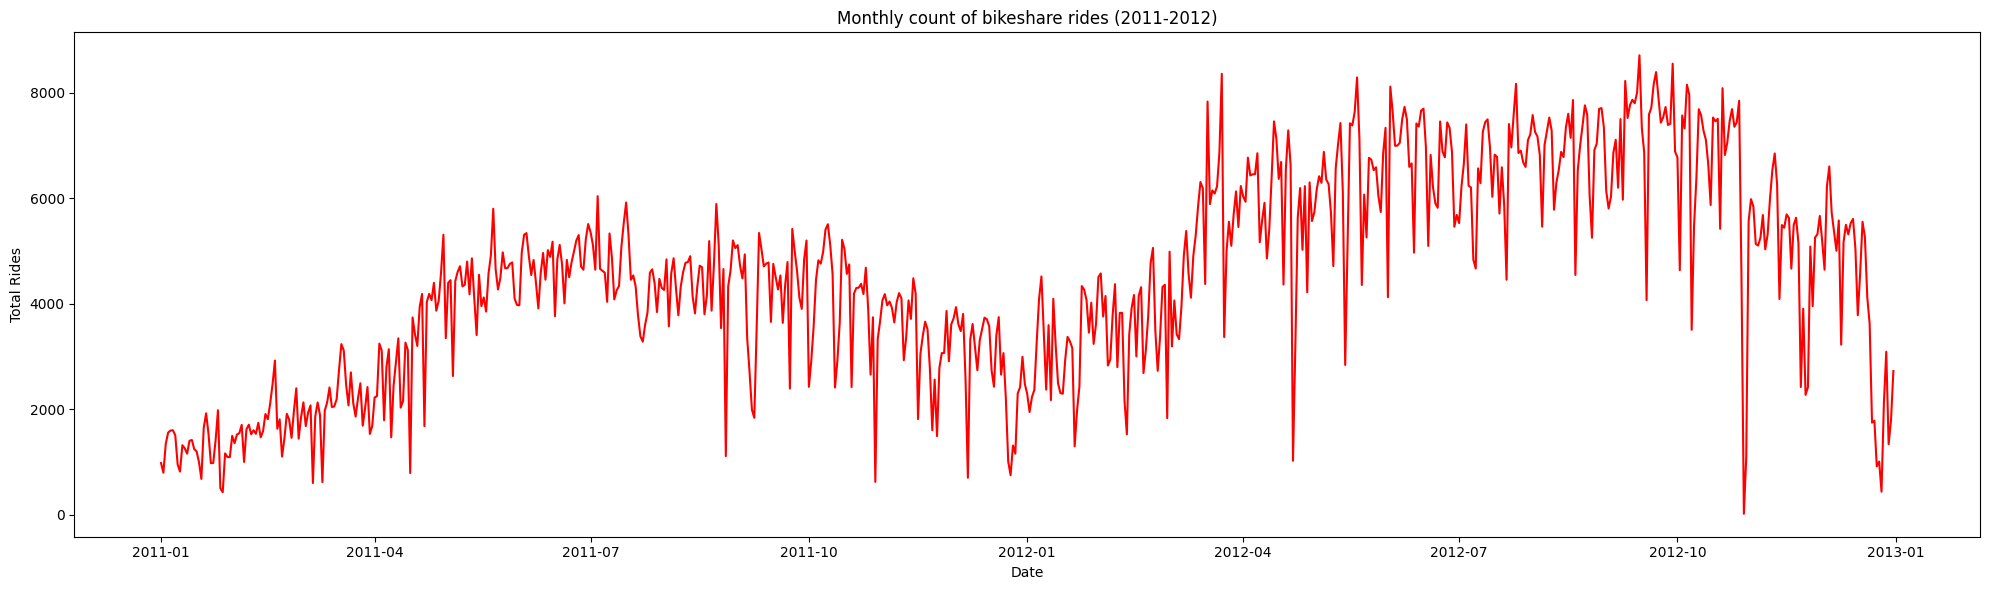

In [23]:
plt.figure(figsize=(20,6))

# Create a line plot using the sns.lineplot() function
sns.lineplot(x="dteday", y="cnt", data=day_df, color='red')

# Add labels and a title to the plot
plt.xlabel("Date")
plt.ylabel("Total Rides")
plt.title("Monthly count of bikeshare rides (2011-2012)")

# Show the plot
plt.tight_layout()
plt.show()

### Pertanyaan 2: Bagaimana pola trafic peminjaman sepeda dalam sehari?

In [24]:
hourly_user_mean = hour_df.groupby(by="hr").cnt.mean()
hourly_casual_mean = hour_df.groupby(by="hr").casual.mean()
hourly_registered_mean = hour_df.groupby(by="hr").registered.mean()

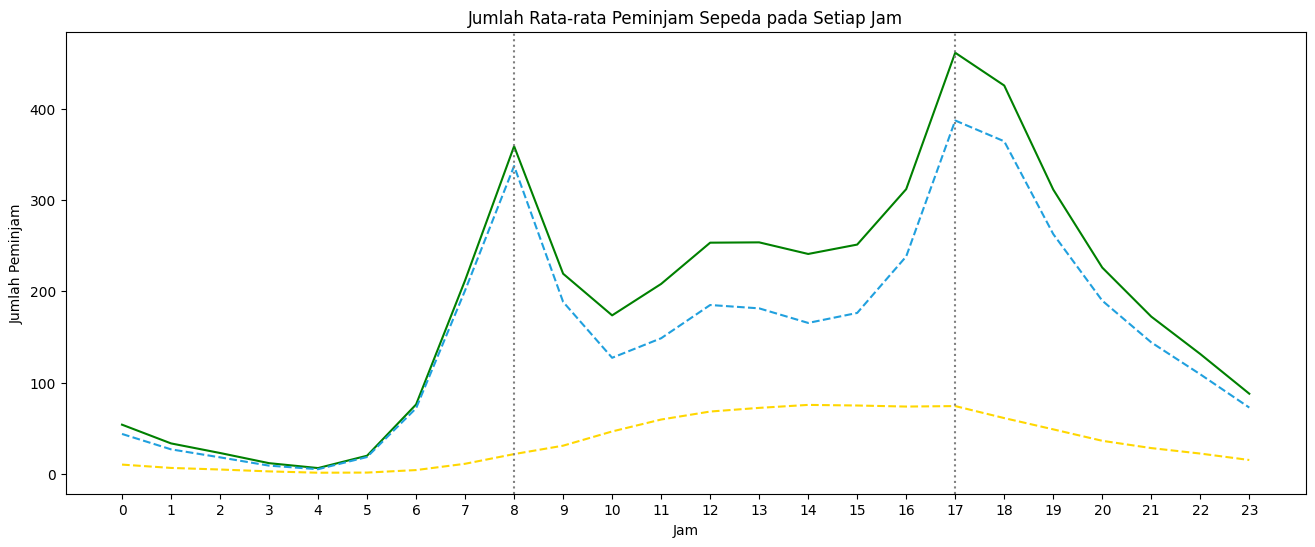

In [25]:
plt.figure(figsize=(16,6))

sns.lineplot(hourly_user_mean, color='green')
sns.lineplot(hourly_casual_mean, color='#ffd700', linestyle='--')
sns.lineplot(hourly_registered_mean, color='#20a0de', linestyle='--')

plt.xlabel("Jam")
plt.ylabel("Jumlah Peminjam")
plt.title("Jumlah Rata-rata Peminjam Sepeda pada Setiap Jam")
plt.xticks(range(24))

# highlight the important data label in the chart
plt.axvline(x=8, color='gray', linestyle=':')
plt.axvline(x=17, color='gray', linestyle=':')

plt.show()

### Pertanyaan 3: Bagaimana perbedaan jumlah peminjaman sepeda pada weekdays, weekend, dan hari libur?

In [26]:
weekday_group = day_df.groupby(by="weekday").agg({
    "casual": ["sum", "mean"],
    "registered": ["sum", "mean"],
    "cnt":  ["sum", "mean"]
})

# Reset index agar lebih mudah diakses
weekday_group.columns = ['casual_sum', 'casual_mean', 'registered_sum', 'registered_mean', 'cnt_sum', 'cnt_mean']
weekday_group = weekday_group.reset_index()

# Mengurutkan nama hari
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_group['weekday'] = pd.Categorical(weekday_group['weekday'], categories=ordered_days, ordered=True)
weekday_group = weekday_group.sort_values('weekday')

display(weekday_group)

,weekday,casual_sum,casual_mean,registered_sum,registered_mean,cnt_sum,cnt_mean
1,Monday,70784,674.133333,384719,3663.990476,455503,4338.123810
5,Tuesday,57843,556.182692,411266,3954.480769,469109,4510.663462
6,Wednesday,57319,551.144231,415729,3997.394231,473048,4548.538462
4,Thursday,61460,590.961538,423935,4076.298077,485395,4667.259615
0,Friday,78238,752.288462,409552,3938.000000,487790,4690.288462
2,Saturday,153852,1465.257143,323955,3085.285714,477807,4550.542857
3,Sunday,140521,1338.295238,303506,2890.533333,444027,4228.828571


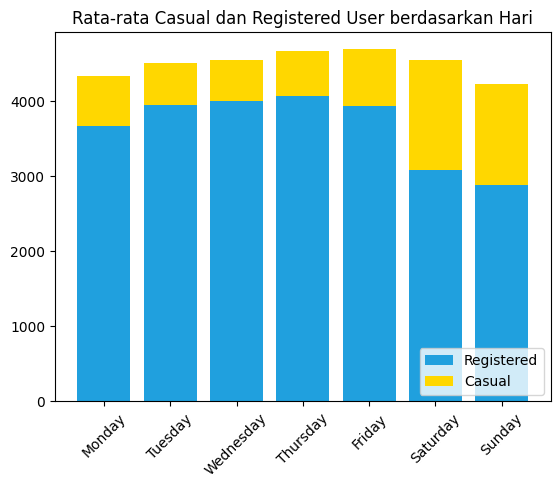

In [27]:
# Membuat plot stacked bar
fig, ax = plt.subplots()

# Plot casual
ax.bar(weekday_group['weekday'], weekday_group['registered_mean'], label='Registered', color="#20a0de")

# Plot registered (stacked on top of casual)
ax.bar(weekday_group['weekday'], weekday_group['casual_mean'], bottom=weekday_group['registered_mean'], label='Casual', color="#ffd700")

ax.set_title('Rata-rata Casual dan Registered User berdasarkan Hari')

# Menambahkan legenda
plt.legend(loc='lower right', fontsize=10)

plt.xticks(rotation=45)
plt.show()

In [28]:
workingday_group = day_df.groupby(by="workingday").agg({
    "casual": ["sum", "mean"],
    "registered": ["sum", "mean"],
    "cnt":  ["sum", "mean"]
})

# Reset index agar lebih mudah diakses
workingday_group.columns = ['casual_sum', 'casual_mean', 'registered_sum', 'registered_mean', 'cnt_sum', 'cnt_mean']
workingday_group = workingday_group.reset_index()
workingday_group['workingday'] = workingday_group['workingday'].replace({0: 'weekend or holiday', 1: 'workingday'})

display(workingday_group)

,workingday,casual_sum,casual_mean,registered_sum,registered_mean,cnt_sum,cnt_mean
0,weekend or holiday,316732,1371.134199,683537,2959.034632,1000269,4330.168831
1,workingday,303285,606.570000,1989125,3978.250000,2292410,4584.820000


Kalau pas libur lebih banyak pengguna casual, tapi kalau pas hari kerja lebih banyak pengguna registered

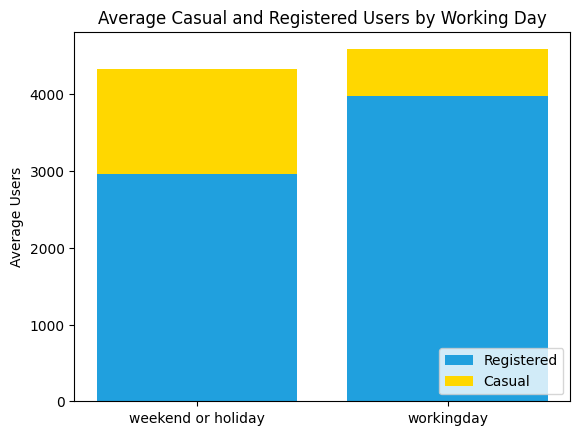

In [29]:
# Membuat plot stacked bar
fig, ax = plt.subplots()

# Plot casual
ax.bar(workingday_group['workingday'], workingday_group['registered_mean'], label='Registered', color="#20a0de")

# Plot registered (stacked on top of casual)
ax.bar(workingday_group['workingday'], workingday_group['casual_mean'], bottom=workingday_group['registered_mean'], label='Casual', color="#ffd700")

# Menambahkan label dan judul
ax.set_ylabel('Average Users')
ax.set_title('Average Casual and Registered Users by Working Day')

# Menambahkan legenda
plt.legend(loc='lower right', fontsize=10)

# Menampilkan plot
plt.show()

### Pertanyaan 4: Bagaimana pengaruh musim, cuaca, temperatur, kelembapan, dan kecepatan angin terhadap jumlah peminjaman sepada?

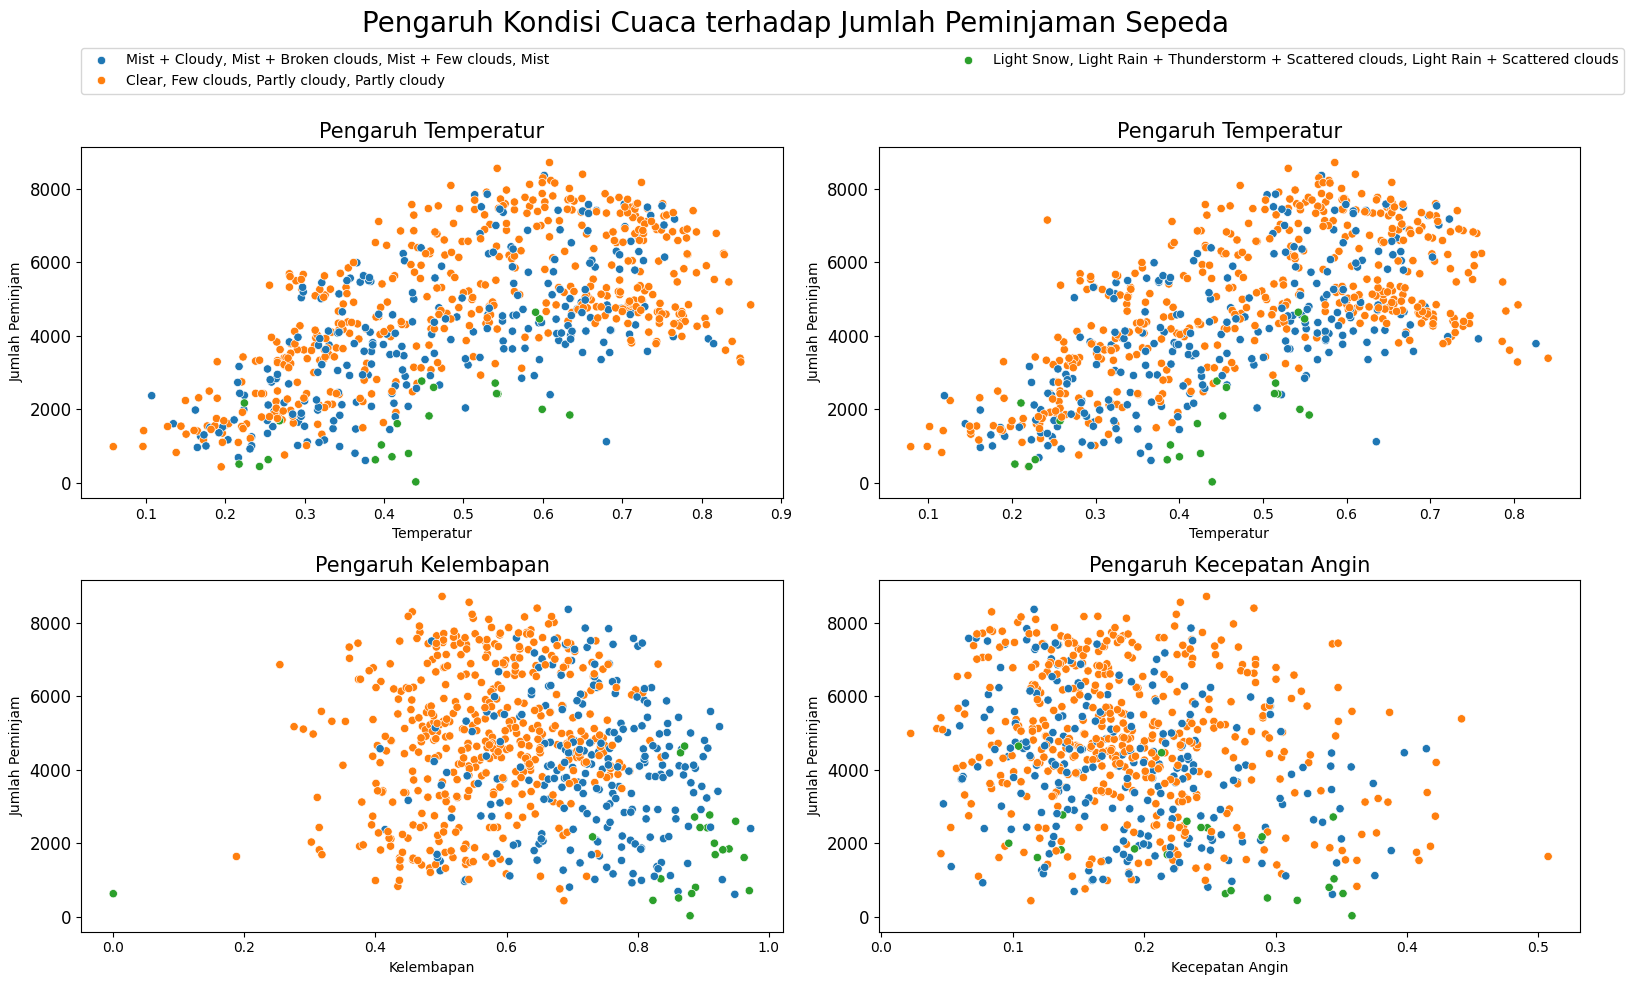

In [30]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

sns.scatterplot(x="temp", y="cnt", hue="weathersit", data=day_df, ax=ax[0, 0])
ax[0, 0].set_ylabel("Jumlah Peminjam")
ax[0, 0].set_xlabel("Temperatur")
ax[0, 0].set_title("Pengaruh Temperatur", loc="center", fontsize=15)
ax[0, 0].tick_params(axis='y', labelsize=12)

sns.scatterplot(x="atemp", y="cnt", hue="weathersit", data=day_df, ax=ax[0, 1], legend=False)
ax[0, 1].set_ylabel("Jumlah Peminjam")
ax[0, 1].set_xlabel("Temperatur")
ax[0, 1].set_title("Pengaruh Temperatur", loc="center", fontsize=15)
ax[0, 1].tick_params(axis='y', labelsize=12)

sns.scatterplot(x="hum", y="cnt", hue="weathersit", data=day_df, ax=ax[1, 0], legend=False)
ax[1, 0].set_ylabel("Jumlah Peminjam")
ax[1, 0].set_xlabel("Kelembapan")
ax[1, 0].set_title("Pengaruh Kelembapan", loc="center", fontsize=15)
ax[1, 0].tick_params(axis='y', labelsize=12)

sns.scatterplot(x="windspeed", y="cnt", hue="weathersit", data=day_df, ax=ax[1, 1], legend=False)
ax[1, 1].set_ylabel("Jumlah Peminjam")
ax[1, 1].set_xlabel("Kecepatan Angin")
ax[1, 1].set_title("Pengaruh Kecepatan Angin", loc="center", fontsize=15)
ax[1, 1].tick_params(axis='y', labelsize=12)

# Membuat satu legend gabungan di luar plot
ax[0, 0].legend(bbox_to_anchor=(0., 1.15, 2.2, .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
#fig.subplots_adjust(top=0.8)

# Menambahkan judul keseluruhan
plt.suptitle("Pengaruh Kondisi Cuaca terhadap Jumlah Peminjaman Sepeda", fontsize=20)
plt.tight_layout()
plt.show()

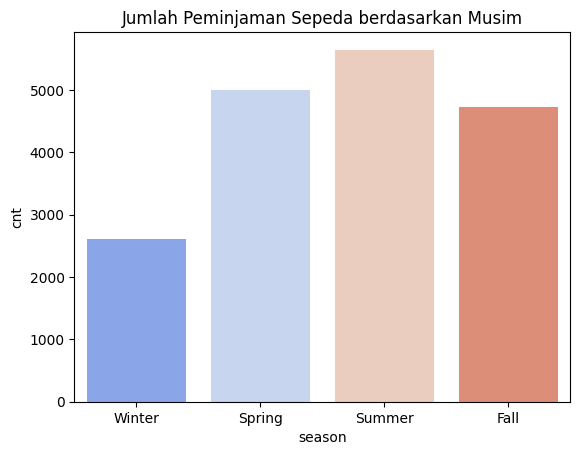

In [31]:
sns.barplot(data=day_df, x="season", y="cnt", hue="season", palette="coolwarm", legend=False, errorbar=None)
plt.title("Jumlah Peminjaman Sepeda berdasarkan Musim")
plt.show()

In [32]:
season_group = day_df.groupby('season')[['casual', 'registered']].sum().reset_index()
display(season_group)

,season,casual,registered
0,Fall,129782,711831
1,Spring,203522,715067
2,Summer,226091,835038
3,Winter,60622,410726


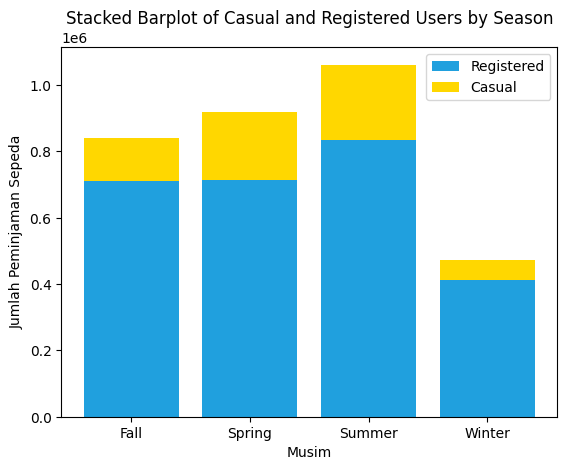

In [33]:
# Misalkan day_df sudah ada, kita group berdasarkan 'season'
season_group = day_df.groupby('season')[['casual', 'registered']].sum().reset_index()

# Membuat plot
fig, ax = plt.subplots()

# Plot casual
ax.bar(season_group['season'], season_group['registered'], label='Registered', color="#20a0de")

# Plot registered (stacked on top of casual)
ax.bar(season_group['season'], season_group['casual'], bottom=season_group['registered'], label='Casual', color="#ffd700")

# Menambahkan label dan judul
ax.set_xlabel('Musim')
ax.set_ylabel('Jumlah Peminjaman Sepeda')
ax.set_title('Stacked Barplot of Casual and Registered Users by Season')

# Menambahkan legenda
ax.legend()

# Menampilkan plot
plt.show()

**Insight:**
- Variabel temperatur dan jumlah peminjaman sepada saling berbanding lurus. Jumlah peminjam sepada cenderung akan meningkat ketika suhunya juga meningkat. 
- Tidak terdapat hubungan yang signifikan antara variabel kelembapan maupun kecepatan angin terhadap jumlah peminjaman sepada.
- 

## Analisis Lanjutan - Clustering

nunjukin pas tanggal berapa aja (ada berapa hari) yang jumlah peminjaman sepedanya rendah, sedang, tinggi

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2